In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pydotplus

from IPython.display import Image

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import os

In [2]:
diabetes_df = pd.read_csv("../Datasets/diabetes.csv")
diabetes_df.shape

(768, 9)

#### 1. Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

--- Standard Model

In [3]:
y=diabetes_df['Outcome'].values 
X=diabetes_df.drop('Outcome',axis=1)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

model = tree.DecisionTreeClassifier(max_depth = 8,random_state=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.66      0.59      0.62        81

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



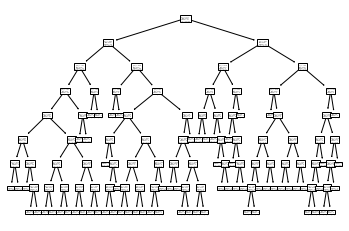

In [4]:
tree.plot_tree(model)
plt.savefig("tree.svg")
plt.show()

--- Tuning the model to improve performance

In [7]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 8),
              "min_samples_leaf": randint(1, 8),
              "criterion": ["gini", "entropy"]}

model2 = tree.DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(model2, param_dist, cv=5)

tree_cv.fit(X_train,y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred2 = tree_cv.predict(X_test)
print(classification_report(y_test, y_pred2))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3}
Best score is 0.7429041190723433
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       150
           1       0.64      0.48      0.55        81

    accuracy                           0.72       231
   macro avg       0.70      0.67      0.67       231
weighted avg       0.71      0.72      0.71       231



##### 2. Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)

Example input:

[ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]

Example output:

Nichole, Tanisha & Maggie

In [14]:
def namelist(names):
    output_string = ''
    if len(names) != 0:
      ls = []
      for i in range(0, len(names) - 1):
          ls.append(names[i]['name'])
      output_string = ', '.join(ls)
      output_string += ' & ' + names[-1]['name'] if str != '' else names[-1]['name']
     
    return output_string

In [15]:
input = [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]

In [16]:
namelist(input)

'Nichole, Tanisha & Maggie'